In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from pprint import pprint as pprint

import os
import sys

N_SAMPLES = 70
COLUMNS = ["Date", "Hour", "Code", "Value"]

In [2]:
index_vals = []
files_name = [None for ii in range(N_SAMPLES)]
for ii in os.listdir():
    if "data" in ii:
        index_vals += [int(ii[-2:])]
        files_name[index_vals[-1] - 1] = ii

index_vals.sort()

In [3]:
files_dict = {}
for x,y in zip(index_vals, files_name):
    files_dict[x]=y

In [4]:
dataframe_container = []

for ii in range(N_SAMPLES):
    temp = pd.read_csv(files_name[ii], sep="\t")
    temp.columns = COLUMNS
    dataframe_container += [temp]

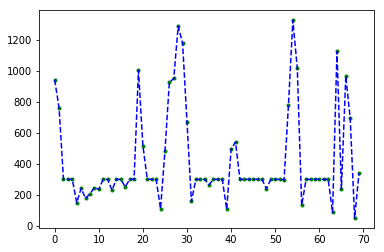

In [5]:
x_temp = np.arange(N_SAMPLES)
y_temp = []
for dfc_element in dataframe_container:
    y_temp.append(dfc_element.shape[0])
    
plt.plot(x_temp, y_temp, ".g")
plt.plot(x_temp, y_temp, "--b")
plt.show()

In [6]:
meta_data_df = pd.DataFrame()
meta_data_df["idx_file"] = x_temp
meta_data_df["n_of_data"] = y_temp

In [7]:
meta_data_df.describe()

,idx_file,n_of_data
count,70.000000,70.000
mean,34.500000,418.000
std,20.351085,304.419
min,0.000000,50.000
25%,17.250000,296.750
50%,34.500000,299.000
75%,51.750000,446.500
max,69.000000,1326.000


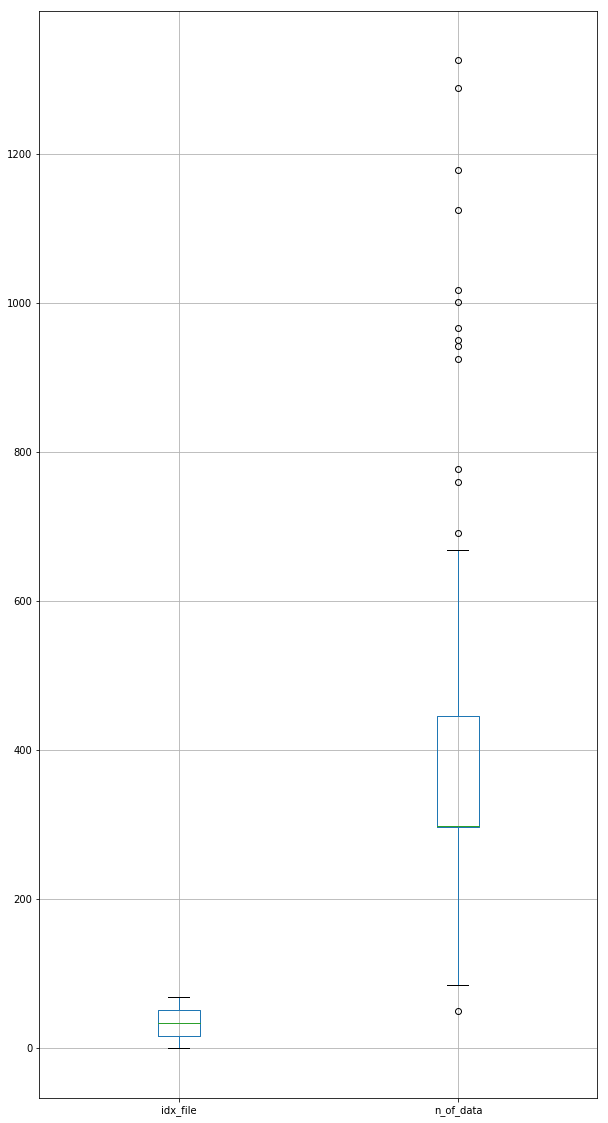

In [8]:
plt.figure(figsize=(10,20))
meta_data_df.boxplot()
plt.show()

In [62]:
code_names = pd.read_csv("./code_names.csv", sep=";", header=0)

code_families = {0:"blood glucose", 1:"insulin dose", 2:"meal ingestion", 3:"exercise activity"}

familie_sublist = [[] for i in range(len(code_families))]
for (ii , ii_str ) in code_families.items():
    for row in code_names.values:
        if ii_str in row[-1]:
            familie_sublist[ii].append(row.tolist())


In [63]:
familie_sublist

[[[48, 'Unspecified blood glucose measurement'],
  [57, 'Unspecified blood glucose measurement'],
  [58, 'Pre-breakfast blood glucose measurement'],
  [59, 'Post-breakfast blood glucose measurement'],
  [60, 'Pre-lunch blood glucose measurement'],
  [61, 'Post-lunch blood glucose measurement'],
  [62, 'Pre-supper blood glucose measurement'],
  [63, 'Post-supper blood glucose measurement'],
  [64, 'Pre-snack blood glucose measurement']],
 [[33, 'Regular insulin dose'],
  [34, 'NPH insulin dose'],
  [35, 'UltraLente insulin dose']],
 [[66, 'Typical meal ingestion'],
  [67, 'More-than-usual meal ingestion'],
  [68, 'Less-than-usual meal ingestion']],
 [[69, 'Typical exercise activity'],
  [70, 'More-than-usual exercise activity'],
  [71, 'Less-than-usual exercise activity']]]